In [81]:
import numpy as np 
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [82]:
import os,cv2
directory='C:/Users/HP/Desktop/finalspectro'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(64,64))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(3043, 64, 64, 3)

In [83]:
i=1
for i in range(8):
    print('No of instances with class value '+ str(i) + ' : ' + str(labels.count(i)))

No of instances with class value 0 : 377
No of instances with class value 1 : 273
No of instances with class value 2 : 407
No of instances with class value 3 : 402
No of instances with class value 4 : 463
No of instances with class value 5 : 405
No of instances with class value 6 : 382
No of instances with class value 7 : 334


In [84]:
num_classes=8
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2,shuffle= True, random_state=20) 

X_t,X_val,y_t,y_val = train_test_split(X_train,y_train, test_size=0.2, shuffle= False)

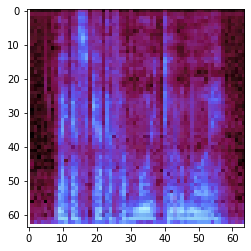

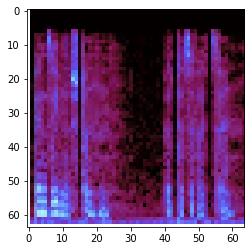

In [85]:
import matplotlib.pyplot as plt
for i in range(2):
    plt.imshow(X_train[i])
    plt.show()

In [86]:
X_train.shape, X_test.shape

((2434, 64, 64, 3), (609, 64, 64, 3))

In [87]:
X_t.shape, X_val.shape

((1947, 64, 64, 3), (487, 64, 64, 3))

In [88]:
import tensorflow as tf
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

In [89]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
no_of_classes = 8
model = Sequential()
#1st CNN layer
model.add(Conv2D(8,(5,5),padding = 'same',input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
#2nd CNN layer
model.add(Conv2D(16,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))
#3rd CNN layer
model.add(Conv2D(100,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))
#4th CNN layer
model.add(Conv2D(200,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
#Fully connected 1st layer
model.add(Dense(units=17424))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Fully connected layer 2nd layer
model.add(Dense(units=1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Fully connected layer 3rd layer
model.add(Dense(units=500))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))


opt=SGD(lr=0.001, momentum= 0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 8)         608       
_________________________________________________________________
batch_normalization_35 (Batc (None, 64, 64, 8)         32        
_________________________________________________________________
activation_35 (Activation)   (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 16)        3216      
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 16)       

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [98]:
history=model.fit(X_t,y_t,epochs=250, batch_size= 64, validation_data=(X_val,y_val))

Epoch 1/250
 2/31 [>.............................] - ETA: 27s - loss: 1.3933 - accuracy: 0.5156

KeyboardInterrupt: 

In [91]:
import os
import cv2
import math
import numpy as np
import pandas as pd


from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils

In [92]:
yhat_test = np.argmax(model.predict(X_t), axis=1)
ytest_ = np.argmax(y_t, axis=1)



test accuracy: 24.037 %


              precision    recall  f1-score   support

           0       0.35      0.10      0.16       235
           1       0.24      0.80      0.36       187
           2       0.47      0.03      0.05       258
           3       0.18      0.68      0.29       260
           4       0.97      0.11      0.20       284
           5       0.31      0.19      0.24       258
           6       0.53      0.09      0.15       257
           7       0.28      0.03      0.06       208

    accuracy                           0.24      1947
   macro avg       0.42      0.25      0.19      1947
weighted avg       0.43      0.24      0.19      1947



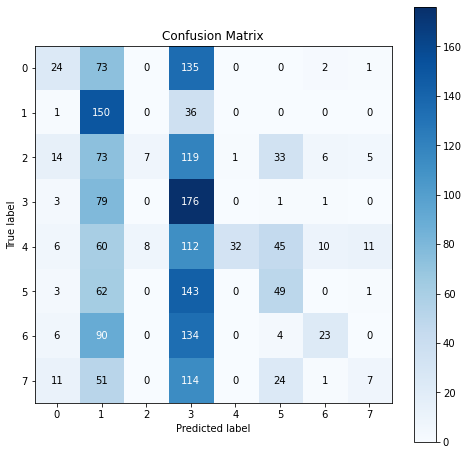

In [93]:
scikitplot.metrics.plot_confusion_matrix(ytest_, yhat_test, figsize=(8,8))
pyplot.savefig("confusion_matrix_mobilenet.png")

test_accu = np.sum(ytest_ == yhat_test) / len(ytest_) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(ytest_, yhat_test))

In [94]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(ytest_, yhat_test))
print()
print("Classification Report")
print(metrics.classification_report(ytest_, yhat_test, digits = 2))

Confusion Matrix for the Test Case
[[ 24  73   0 135   0   0   2   1]
 [  1 150   0  36   0   0   0   0]
 [ 14  73   7 119   1  33   6   5]
 [  3  79   0 176   0   1   1   0]
 [  6  60   8 112  32  45  10  11]
 [  3  62   0 143   0  49   0   1]
 [  6  90   0 134   0   4  23   0]
 [ 11  51   0 114   0  24   1   7]]

Classification Report
              precision    recall  f1-score   support

           0       0.35      0.10      0.16       235
           1       0.24      0.80      0.36       187
           2       0.47      0.03      0.05       258
           3       0.18      0.68      0.29       260
           4       0.97      0.11      0.20       284
           5       0.31      0.19      0.24       258
           6       0.53      0.09      0.15       257
           7       0.28      0.03      0.06       208

    accuracy                           0.24      1947
   macro avg       0.42      0.25      0.19      1947
weighted avg       0.43      0.24      0.19      1947



In [95]:
def plot_confusion_matrix(ytest_, yhat_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(ytest_, yhat_test)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [96]:
emotion_labels = ['0', '1', '2', '3', '4', '5', '6','7']

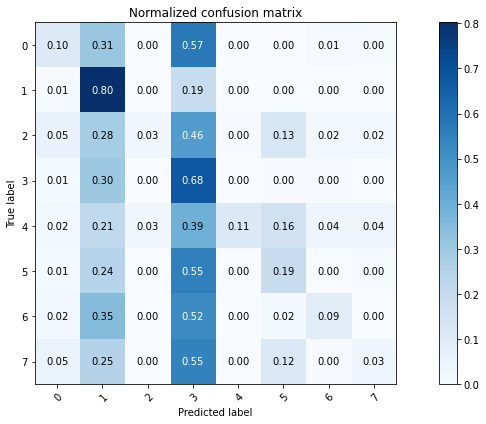

In [97]:
plot_confusion_matrix(ytest_,yhat_test, classes=emotion_labels, normalize=True, title='Normalized confusion matrix' )
plt.show()

In [77]:
Y_pred=model.predict(X_t)
Y_pred = np.argmax(Y_pred, axis=1)

Text(0.5, 1.0, 'Loss')

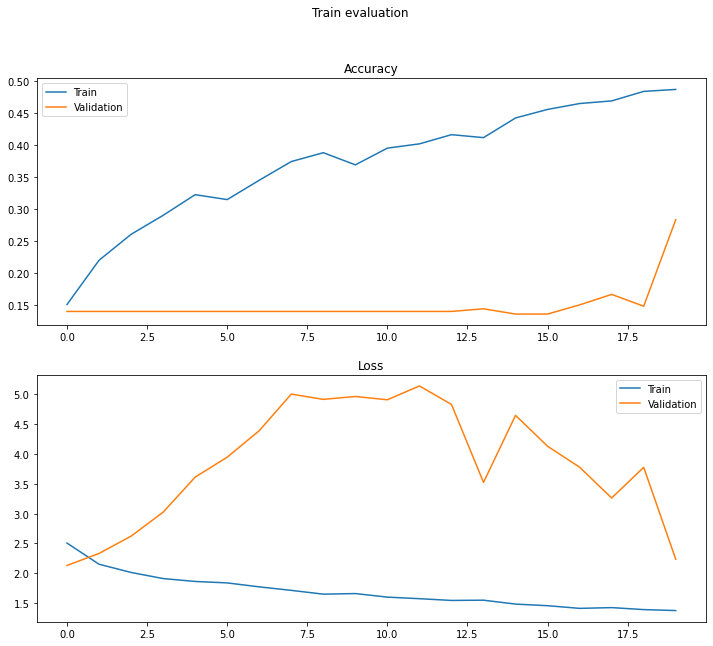

In [78]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [79]:
print('-Acuracy achieved on test set : {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(np.where(y_t == 1)[1],Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

-Acuracy achieved on test set : 30.87%
-Accuracy by model was: 48.74%
-Accuracy by validation was: 28.34%
